<a href="https://colab.research.google.com/github/isaacd68/MAT421/blob/main/17_4%2C17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lagrange Polynomial Interpolation**

Enter number of data points: 5

Enter data for x and y: 

x[0]=5

y[0]=150

x[1]=7

y[1]=392

x[2]=11

y[2]=1452

x[3]=13

y[3]=2366

x[4]=17

y[4]=5202

Enter interpolation point: 9

In [1]:
# Lagrange Interpolation

# Importing NumPy Library
import numpy as np

# Reading number of unknowns
n = int(input('Enter number of data points: '))

# Making numpy array of n & n x n size and initializing 
# to zero for storing x and y value along with differences of y
x = np.zeros((n))
y = np.zeros((n))
3

# Implementing Lagrange Interpolation
for i in range(n):
    
    p = 1
    
    for j in range(n):
        if i != j:
            p = p * (xp - x[j])/(x[i] - x[j])
    
    yp = yp + p * y[i]    

# Displaying output
print('Interpolated value at %.3f is %.3f.' % (xp, yp))

Enter number of data points: 5
Enter data for x and y: 
x[0]=5
y[0]=150
x[1]=7
y[1]=392
x[2]=11
y[2]=1452
x[3]=13
y[3]=2366
x[4]=17
y[4]=5202
Enter interpolation point: 9
Interpolated value at 9.000 is 810.000.


**Another example**

In [6]:
def lagrange_interpolation(x,y,xx):
    n = len(x)
    sum = 0
    for i in range(n):
        product = y[i]
        for j in range(n):
            if i != j:
                product = product*(xx - x[j])/(x[i]-x[j])
        sum = sum + product
    return sum

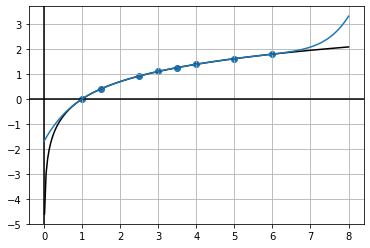

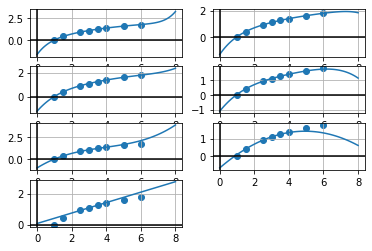

In [7]:
plt.scatter(x,y)
xx = np.linspace(0, 8, 100)
yy = [lagrange_interpolation(x,y,i) for i in xx]
xo= np.linspace(0.01,8,200)
plt.plot(xo, np.log(xo), label="f(x)=lnx", color="black")
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(xx,yy)
fig = plt.figure()
for i in range(1,len(x)):
    g1 = fig.add_subplot(len(x)/2,2,i)
    g1.plot(xx, lagrange_interpolation(x[i-1:],y[i-1:],xx))
    g1.scatter(x,y)
    plt.grid(True, which='both')
    plt.axvline(x=0, color='k')
    plt.axhline(y=0, color='k')

# Newton’s Polynomial Interpolation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This is the algorithm for Newton’s polynomial. It accepts an array of x and y values, and the value (xi) you want to interpolate. This function returned a multidimensional array of the interpolated values for different orders and their respective relative errors that would be used for visualization. (But you can modify the code to return an array of interpolated values in different orders if you don’t need to visualize)

In [3]:
def newton_interpolation(x, y, xi):
    #length/number of datapoints
    n = len(x)
    #divided difference initialization
    fdd = [[None for x in range(n)] for x in range(n)]
    #f(X) values at different degrees
    yint = [None for x in range(n)]
    #error value
    ea = [None for x in range(n)]
    
    #finding divided difference
    for i in range(n):
        fdd[i][0] = y[i]
    for j in range(1,n):
        for i in range(n-j):
            fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
    
    #just printing dd here
    fdd_table = pd.DataFrame(fdd)
    print(fdd_table)
    
    #interpolating xi
    xterm = 1
    yint[0] = fdd[0][0]
    for order in range(1, n):
        xterm = xterm * (xi - x[order-1])
        yint2 = yint[order-1] + fdd[0][order]*xterm
        ea[order-1] = yint2 - yint[order-1]
        yint[order] = yint2
    
    #returning a map for pandas dataframe
    return map(lambda yy, ee : [yy, ee], yint, ea)

For our sample problem, we will try to estimate the value of ln(2) using the given datapoints:

In [4]:
x = [1,4,6, 5, 3, 1.5, 2.5, 3.5]
y = [0, 1.3862944, 1.7917595, 1.6094379, 1.0986123 , 0.4054641, 0.9162907, 1.2527630]

We can use our newton_interpolation function to solve for ln(2)

In [5]:
a = newton_interpolation(x, y, 2)
df = pd.DataFrame(a, columns=['f(x)','error'])

          0         1         2  ...         5         6         7
0  0.000000  0.462098 -0.051873  ...  0.000908 -0.000301  0.000076
1  1.386294  0.202733 -0.020411  ...  0.000456 -0.000110       NaN
2  1.791759  0.182322 -0.024364  ...  0.000511       NaN       NaN
3  1.609438  0.255413 -0.059053  ...       NaN       NaN       NaN
4  1.098612  0.462099 -0.097456  ...       NaN       NaN       NaN
5  0.405464  0.510827 -0.087177  ...       NaN       NaN       NaN
6  0.916291  0.336472       NaN  ...       NaN       NaN       NaN
7  1.252763       NaN       NaN  ...       NaN       NaN       NaN

[8 rows x 8 columns]
